In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import nltk
import pandas as pd
#from emoticons import EmoticonDetector
import re as regex
import numpy as np
#import plotly
#from plotly import graph_objs
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
#plotly.offline.init_notebook_mode()

import seaborn as sns
import plotly
!pip install cufflinks as cf
import re
nltk.download('punkt')

Unable to create process using 'C:\Users\libbe raj\anaconda3\python.exe "C:\Users\libbe raj\anaconda3\Scripts\pip-script.py" install cufflinks as cf'
[nltk_data] Downloading package punkt to C:\Users\libbe
[nltk_data]     raj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.rename(columns={'Category': 'emotion'}, inplace=True)
test_data.rename(columns={'Category': 'Tweet'}, inplace=True)

train_data = train_data[train_data['emotion'] != 'Tweet']

In [7]:
train_data.head()

,Id,emotion,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5969 entries, 0 to 5969
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       5969 non-null   object
 1   emotion  5969 non-null   object
 2   Tweet    5969 non-null   object
dtypes: object(3)
memory usage: 186.5+ KB


In [9]:
test_data.head()

,Id,Tweet
0,6.289494e+17,dear @Microsoft the newOoffice for Mac is grea...
1,6.289766e+17,@Microsoft how about you make a system that do...
2,6.290232e+17,Not Available
3,6.291792e+17,Not Available
4,6.291863e+17,If I make a game as a #windows10 Universal App...


<AxesSubplot:xlabel='emotion', ylabel='count'>

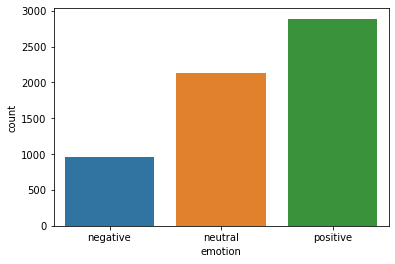

In [10]:
sns.countplot(x='emotion',data=train_data)

In [11]:
train_data = train_data[train_data['Tweet'] != "Not Available"]


In [15]:
def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    return tweet

In [13]:
train_data['Tweet'] = train_data['Tweet'].apply(clean_tweets)

In [14]:
train_data['Tweet'].head()

1    IOS  App Transport Security Mm need to check i...
2    Mar if you have an iOS device you should downl...
3    my phone does not run on latest IOS which may ...
4    Not sure how to start your publication on iOS ...
5    Two Dollar Tuesday is here with Forklift  Quic...
Name: Tweet, dtype: object

In [16]:
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
train_data['Tweet'].apply(tt.tokenize)

1       [IOS, App, Transport, Security, Mm, need, to, ...
2       [Mar, if, you, have, an, iOS, device, you, sho...
3       [my, phone, does, not, run, on, latest, IOS, w...
4       [Not, sure, how, to, start, your, publication,...
5       [Two, Dollar, Tuesday, is, here, with, Forklif...
                              ...                        
5963    [Ok, ed, lets, do, this, Zlatan, greizmann, an...
5964    [Goal, level, Zlatan, k, by, Friday, Posting, ...
5965    [Wouldnt, surprise, me, if, we, enquiredHe, ca...
5966    [Rib, injury, for, Zlatan, against, Russia, is...
5967    [Noooooo, I, was, hoping, to, see, Zlatan, bei...
Name: Tweet, Length: 5421, dtype: object

In [17]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
def tokenize(text):
    return word_tokenize(text)

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words
# apply tokenize function
train_data['text'] = train_data['Tweet'].apply(tokenize)
# apply steming function
train_data['tokenized'] = train_data['text'].apply(stemming)
train_data.head()

,Id,emotion,Tweet,text,tokenized
1,635930169241374720,neutral,IOS App Transport Security Mm need to check i...,"[IOS, App, Transport, Security, Mm, need, to, ...","[io, app, transport, secur, mm, need, to, chec..."
2,635950258682523648,neutral,Mar if you have an iOS device you should downl...,"[Mar, if, you, have, an, iOS, device, you, sho...","[mar, if, you, have, an, io, devic, you, shoul..."
3,636030803433009153,negative,my phone does not run on latest IOS which may ...,"[my, phone, does, not, run, on, latest, IOS, w...","[my, phone, doe, not, run, on, latest, io, whi..."
4,636100906224848896,positive,Not sure how to start your publication on iOS ...,"[Not, sure, how, to, start, your, publication,...","[not, sure, how, to, start, your, public, on, ..."
5,636176272947744772,neutral,Two Dollar Tuesday is here with Forklift Quic...,"[Two, Dollar, Tuesday, is, here, with, Forklif...","[two, dollar, tuesday, is, here, with, forklif..."


In [18]:
words = Counter()
for idx in train_data.index:
    words.update(train_data.loc[idx, "text"])

words.most_common(5)
[('the', 3960), ('to', 2466), ('a', 1591), ('on', 1518), ('I', 1496)]
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to C:\Users\libbe
[nltk_data]     raj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [19]:
whitelist = ["n't", "not"]
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]
words.most_common(5)

[('I', 1496), ('may', 914), ('th', 671), ('tomorrow', 651), ('not', 372)]

In [22]:
def word_list(processed_data):
    #print(processed_data)
    min_occurrences=3 
    max_occurences=500 
    stopwords=nltk.corpus.stopwords.words("english")
    whitelist = ["n't","not"]
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
    #print(whitelist)
    '''
    import os
    if os.path.isfile("wordlist.csv"):
        word_df = pd.read_csv("wordlist.csv")
        word_df = word_df[word_df["occurrences"] > min_occurrences]
        wordlist = list(word_df.loc[:, "word"])
        #return
    '''
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "text"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlist.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    #print(wordlist)

In [23]:
word_list(train_data)
words = pd.read_csv("wordlist.csv")

In [24]:
import os
wordlist= []
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in train_data.index:
    current_row = []
    
    # add label
    current_label = train_data.loc[idx, "emotion"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(train_data.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)


bow = data_model

In [28]:
import random
seed = 777
random.seed(seed)
def test_classifier(X_train, y_train, X_test, y_test, classifier):
    log("")
    log("---------------------------------------------------------")
    log("Testing " + str(type(classifier).__name__))
    now = time()
    list_of_labels = sorted(list(set(y_train)))
    model = classifier.fit(X_train, y_train)
    log("Learing time {0}s".format(time() - now))
    now = time()
    predictions = model.predict(X_test)
    log("Predicting time {0}s".format(time() - now))

    # Calculate Accuracy, Precision, recall
    
    precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    
    log("=================== Results ===================")
    log("            Negative     Neutral     Positive")
    log("F1       " + str(f1))
    log("Precision" + str(precision))
    log("Recall   " + str(recall))
    log("Accuracy " + str(accuracy))
    log("===============================================")
    return precision, recall, accuracy, f1

def log(x):
    #can be used to write to log file
    print(x)


In [29]:
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(bow.iloc[:, 1:], bow['label'], test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, BernoulliNB())


---------------------------------------------------------
Testing BernoulliNB
Learing time 0.2577171325683594s
Predicting time 0.08989930152893066s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.32432432 0.44879786 0.68677494]
Precision[0.42857143 0.48554913 0.62054507]
Recall   [0.26086957 0.41721854 0.76883117]
Accuracy 0.5593116164720344


In [30]:
def cv(classifier, X_train, y_train):
    log("===============================================")
    classifier_name = str(type(classifier).__name__)
    now = time()
    log("Crossvalidating " + classifier_name + "...")
    accuracy = [cross_val_score(classifier, X_train, y_train, cv=8, n_jobs=-1)]
    log("Crosvalidation completed in {0}s".format(time() - now))
    log("Accuracy: " + str(accuracy[0]))
    log("Average accuracy: " + str(np.array(accuracy[0]).mean()))
    log("===============================================")
    return accuracy

In [32]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.rename(columns={'Category': 'emotion'}, inplace=True)
test_data.rename(columns={'Category': 'emotion'}, inplace=True)

train_data = train_data[train_data['emotion'] != 'Tweet']
test_data = test_data[test_data['emotion'] != 'Tweet']
def add_extra_feature(df, tweet_column):
    
    # Print Number of Exclamation
    #length_of_excl = (len(re.findall(r'!', string)))
    df['number_of_exclamation'] = tweet_column.apply(lambda x: (len(re.findall(r'!', x))))
    
    # Number of ?
    #length_of_questionmark = (len(re.findall(r'?', string)))
    df['number_of_questionmark'] = tweet_column.apply(lambda x: (len(re.findall(r'[?]', x))))
    
    # Number of #
    df['number_of_hashtag'] = tweet_column.apply(lambda x: (len(re.findall(r'#', x))))
    
    # Number of @
    df['number_of_mention'] = tweet_column.apply(lambda x: (len(re.findall(r'@', x))))
    
    # Number of Quotes
    df['number_of_quotes'] = tweet_column.apply(lambda x: (len(re.findall(r"'", x))))

    # Number if underscore
    df['number_of_underscore'] = tweet_column.apply(lambda x: (len(re.findall(r'_', x))))
    

In [33]:
add_extra_feature(train_data, train_data["Tweet"])

In [36]:
class EmoticonDetector:
    emoticons = {}

    def __init__(self, emoticon_file="emoticons.txt"):
        from pathlib import Path
        content = Path(emoticon_file).read_text()
        positive = True
        for line in content.split("\n"):
            if "positive" in line.lower():
                positive = True
                continue
            elif "negative" in line.lower():
                positive = False
                continue

            self.emoticons[line] = positive

    def is_positive(self, emoticon):
        if emoticon in self.emoticons:
            return self.emoticons[emoticon]
        return False

    def is_emoticon(self, to_check):
        return to_check in self.emoticons
ed = EmoticonDetector()

In [38]:

processed_data = train_data.copy()

def add_column(column_name, column_content):
    processed_data.loc[:, column_name] = pd.Series(column_content, index=processed_data.index)

def count_by_lambda(expression, word_array):
    return len(list(filter(expression, word_array)))

add_column("splitted_text", map(lambda txt: txt.split(" "), processed_data["Tweet"]))

positive_emo = list(
    map(lambda txt: count_by_lambda(lambda word: ed.is_emoticon(word) and ed.is_positive(word), txt),
        processed_data["splitted_text"]))
add_column("number_of_positive_emo", positive_emo)

negative_emo = list(map(
    lambda txt: count_by_lambda(lambda word: ed.is_emoticon(word) and not ed.is_positive(word), txt),
    processed_data["splitted_text"]))

add_column("number_of_negative_emo", negative_emo)
train_data['number_of_positive_emo'] = positive_emo
train_data['number_of_negative_emo'] = negative_emo

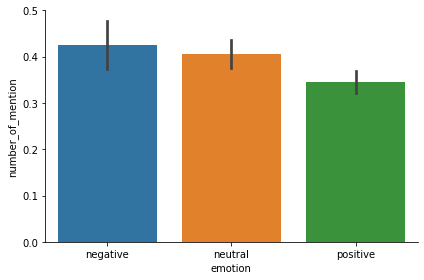

In [39]:
sns.barplot(x='emotion', y='number_of_mention', data=train_data)
sns.despine()
plt.tight_layout()

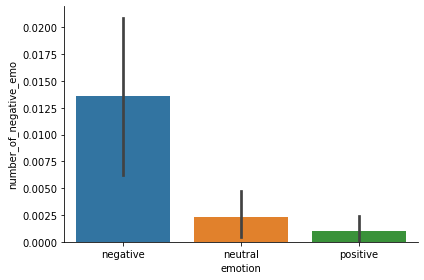

In [40]:
sns.barplot(x='emotion', y='number_of_negative_emo', data=train_data)
sns.despine()
plt.tight_layout()

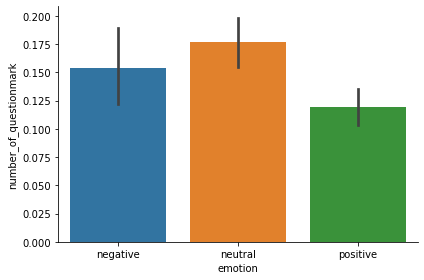

In [42]:
sns.barplot(x='emotion', y='number_of_questionmark', data=train_data)
sns.despine()
plt.tight_layout()

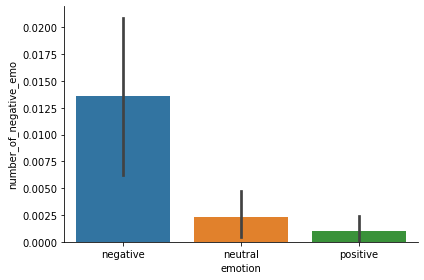

In [43]:
sns.barplot(x='emotion', y='number_of_negative_emo', data=train_data)
sns.despine()
plt.tight_layout()

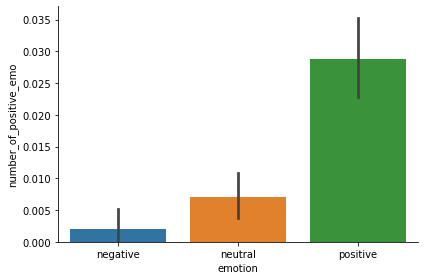

In [44]:
sns.barplot(x='emotion', y='number_of_positive_emo', data=train_data)
sns.despine()
plt.tight_layout()


In [45]:
train_data.head()

,Id,emotion,Tweet,number_of_exclamation,number_of_questionmark,number_of_hashtag,number_of_mention,number_of_quotes,number_of_underscore,number_of_positive_emo,number_of_negative_emo
0,635769805279248384,negative,Not Available,0,0,0,0,0,0,0,0
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,0,0,0,0,0,0,0,0
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",0,0,0,0,0,0,0,0
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,0,0,0,1,0,1,0,0
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0,1,0,0,1,0,0,0


In [47]:
train_data['Tweet'] = train_data['Tweet'].apply(clean_tweets)
## Tokenize data
train_data['text'] = train_data['Tweet'].apply(tokenize)
train_data['tokenized'] = train_data['text'].apply(stemming)
## BAG OF WORDS
wordlist= []
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in train_data.index:
    current_row = []
        # add label
    current_label = train_data.loc[idx, "emotion"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(train_data.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)

In [50]:
data_model = data_model.drop(columns=['emotion','Tweet','text', 'tokenized','Id'], axis=1)